<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

## Propagation Delay Calculation and flight path distance estimation

In this tutorial we will see how to calculate the $t_0$ with the known sample. To ensure accurate estimation you should select your peak within the big mc range. You should also make your calculation for a small volume specially and for a small variation of voltage. Another pont is that you should choose a narrow window around your peaks.

</div>

In [1]:
# Activate intractive functionality of matplotlib
%matplotlib ipympl
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
# import libraries
import os
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from ipywidgets import fixed, interact_manual, widgets
from ipywidgets import Output
from IPython.display import clear_output

# Local module and scripts
from pyccapt.calibration.calibration_tools import share_variables
from pyccapt.calibration.data_tools import data_tools, dataset_path_qt
from pyccapt.calibration.mc import mc_tools
from pyccapt.calibration.calibration_tools import widgets as wd
from pyccapt.calibration.calibration_tools import mc_plot

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

By clicking on the button below, you can select the dataset file you want to use. The dataset file can be in various formats, including HDF5, EPOS, POS, ATO, and CSV.
</div>

In [2]:
button = widgets.Button(
    description='load dataset',
)
@button.on_click
def open_file_on_click(b):
    """
    Event handler for button click event.
    Prompts the user to select a dataset file and stores the selected file path in the global variable dataset_path.
    """
    global dataset_path
    dataset_path = dataset_path_qt.gui_fname().decode('ASCII')
button

Button(description='load dataset', style=ButtonStyle())

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">
In case of recieving the error about pytable library, you have to install the pytables library with conda command. to do that you can open a new cell and copy the line below in it. Then just run it like other cells. The pytables library will be innstalled.
    
`!conda install --yes --prefix {sys.prefix} pytables`
</div>


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">
From the dropdown lists below, you can select the instrument specifications of the dataset. The instrument specifications are the same as the ones used for the calibration process. Data mode is specify the dataset structure. The flight path length is the distance between the sample and the detector. The t0 is the time of flight of the ions with the lowest mass-to-charge ratio. The maximum mass-to-charge ratio is the maximum mass-to-charge ratio of tat you want to plot. You can also change it in te related cells. The detector diameter is the diameter of the detector.
</div>


In [3]:
tdc, pulse_mode, flightPathLength_d, t0_d, max_mc, det_diam = wd.dataset_instrument_specification_selection()
display(tdc, pulse_mode, flightPathLength_d, max_mc)

Dropdown(description='Data mode:', options=('PyCCAPT', 'leap_epos', 'leap_pos', 'ato_v6'), value='PyCCAPT')

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

FloatText(value=110.0, description='Flight path length:')

FloatText(value=400.0, description='Max mc:')

In [4]:
# exctract needed data from Pandas data frame as an numpy array
# create an instance of the Variables opject
variables = share_variables.Variables()
variables.pulse_mode = pulse_mode

dataset_main_path = os.path.dirname(dataset_path)
dataset_main_path = os.path.dirname(dataset_main_path)
dataset_name_with_extention = os.path.basename(dataset_path)
variables.dataset_name = os.path.splitext(dataset_name_with_extention)[0]
variables.result_data_path = dataset_main_path + '/t_0_flight_path_distance/'
variables.result_data_name = variables.dataset_name
variables.result_path = dataset_main_path + '/t_0_flight_path_distance/'

if not os.path.isdir(variables.result_path):
    os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
    
# Create data farame out of hdf5 file dataset
data = data_tools.load_data(dataset_path, tdc.value, mode='processed')
# extract data from the path and create the Variable object
data_tools.extract_data(data, variables, flightPathLength_d.value, max_mc.value)

The maximum time of flight: 5010


In [5]:
data

,x (nm),y (nm),z (nm),mc_c (Da),mc (Da),high_voltage (V),pulse,start_counter,t_c (ns),t (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp
0,0.0,0.0,0.0,0.0,28.993453,5019.959961,1003.992004,7565,0.0,618.564148,2.651428,0.594286,0,0
1,0.0,0.0,0.0,0.0,29.360520,5019.959961,1003.992004,7664,0.0,606.260925,-0.055510,0.649796,99,2
2,0.0,0.0,0.0,0.0,29.441372,5019.959961,1003.992004,7682,0.0,606.932983,-0.107755,0.607347,18,1
3,0.0,0.0,0.0,0.0,28.725689,5019.959961,1003.992004,7690,0.0,611.520996,2.285714,-0.457143,8,1
4,0.0,0.0,0.0,0.0,29.512555,5019.959961,1003.992004,7794,0.0,614.298462,0.486531,1.740408,104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571243,0.0,0.0,0.0,0.0,29.759238,6351.169922,1270.234009,19549,0.0,550.999146,-0.460408,1.456326,105,1
10571244,0.0,0.0,0.0,0.0,29.967560,6351.169922,1270.234009,19664,0.0,551.705505,-1.342041,-0.120816,31,1
10571245,0.0,0.0,0.0,0.0,29.029561,6351.169922,1270.234009,19762,0.0,545.156128,1.567347,0.300408,98,1
10571246,0.0,0.0,0.0,0.0,28.815053,6351.169922,1270.234009,19833,0.0,543.187866,1.319184,-0.868571,71,1


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Extract the data from the dataset file in numpy array format.
</div>

In [6]:
# exctract needed data from Pandas data frame as an numpy array

# exctract needed data from Pandas data frame as an numpy array
variables.dld_high_voltage = data['high_voltage (V)'].to_numpy()
variables.dld_pulse = data['pulse'].to_numpy()
variables.dld_t = data['t (ns)'].to_numpy()
variables.dld_x = data['x_det (cm)'].to_numpy()
variables.dld_y = data['y_det (cm)'].to_numpy()
# calculate the mc based on t_0 = 0
variables.mc = mc_tools.tof2mc(variables.dld_t, 0, variables.dld_high_voltage, variables.dld_x, variables.dld_y, flightPathLength_d.value, 
                                         variables.dld_pulse, mode=pulse_mode.value)


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

plot the histogram of the mass spectrum.
</div>

In [13]:
interact_manual(mc_plot.hist_plot, variables=fixed(variables), bin_size=widgets.FloatText(value=0.1), log=widgets.Dropdown(options=[('True', True), ('Flase', False)]),
                target=widgets.Dropdown(options=[('mc', 'mc')]), mode=widgets.Dropdown(options=[('normal', 'normal'), ('normalized', 'normalized')]),
                prominence=widgets.IntText(value=50), distance=widgets.IntText(value=10),
                lim=widgets.IntText(value=400), percent=widgets.IntText(value=80), selector=fixed('peak'), plot=fixed(True), figname=widgets.Text(value='hist'),
                peaks_find_plot=widgets.Dropdown(options=[('True', True), ('Flase', False)]), range_plot=fixed(False), selected_area_temporally=fixed(False), 
                ranging_mode=fixed(False), save_fig=fixed(True), print_info=fixed(True), selected_area_specially=fixed(False), figure_size=fixed((9, 5)));

C:\Users\APTUser\AppData\Local\Temp\ipykernel_59228\3246701459.py:1: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(mc_plot.hist_plot, variables=fixed(variables), bin_size=widgets.FloatText(value=0.1), log=widgets.Dropdown(options=[('True', True), ('Flase', False)]),


interactive(children=(FloatText(value=0.1, description='bin_size'), Dropdown(description='log', options=(('Tru…

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

For the selected peak you have to select the mass-to-charge ratio of the peak. You can select the mass-to-charge ratio from the dropdown list below. You can also select the charge of the peak. After that you can add the peak to the list by clicking on the add button. You can also delete the selected peak from the list by clicking on the delete button. You can reset the list by clicking on the reset button.

</div>


In [14]:
isotopeTableFile = '../../../files/isotopeTable.h5'
dataframe = data_tools.read_hdf5_through_pandas(isotopeTableFile)
elementsList = dataframe['element']
elementIsotopeList = dataframe['isotope']
elementMassList =  dataframe['weight']
abundanceList = dataframe['abundance']

elements = list(zip(elementsList, elementIsotopeList, elementMassList, abundanceList))
dropdownList = []
for element in elements:
    tupleElement = ("{} ({}) ({:.2f})".format(element[0], element[1], element[3]), "{}({})[{}]".format(element[0], element[1], element[2]))
    dropdownList.append(tupleElement)

chargeList = [(1,1,),(2,2,),(3,3,),(4,4,)]
dropdown = wd.dropdownWidget(dropdownList,"Elements")
dropdown.observe(wd.on_change)


chargeDropdown = wd.dropdownWidget(chargeList,"Charge")
chargeDropdown.observe(wd.on_change_charge)

wd.compute_element_isotope_values_according_to_selected_charge()

buttonAdd = wd.buttonWidget("ADD")
buttonDelete = wd.buttonWidget("DELETE")
buttonReset = wd.buttonWidget("RESET")

display(dropdown, chargeDropdown, buttonAdd, buttonDelete, buttonReset)

def buttonAdd_f(b,):
    with out:
        clear_output(True)
        wd.onClickAdd(b, variables)
        display()
def buttonDelete_f(b,):
    with out:
        clear_output(True)
        wd.onClickDelete(b, variables)
        display()
def buttonResett_f(b,):
    with out:
        clear_output(True)
        wd.onClickReset(b, variables)
        display()

listMaterial = buttonAdd.on_click(buttonAdd_f)
buttonDelete.on_click(buttonDelete_f)
buttonReset.on_click(buttonResett_f)
# listMaterial = buttonAdd.on_click(wd.onClickAdd)
# buttonDelete.on_click(wd.onClickDelete)
# buttonReset.on_click(wd.onClickReset)
out = Output()
display(out)

Dropdown(description='Elements', options=(('H (1) (99.98)', 'H(1)[1.01]'), ('H (2) (0.01)', 'H(2)[2.01]'), ('H…

Dropdown(description='Charge', options=((1, 1), (2, 2), (3, 3), (4, 4)), value=1)

Button(description='ADD', icon='check', style=ButtonStyle(), tooltip='ADD')

Button(description='DELETE', icon='check', style=ButtonStyle(), tooltip='DELETE')

Button(description='RESET', icon='check', style=ButtonStyle(), tooltip='RESET')

Output()

In [15]:
# The correct peak location based on your sample
peaks_ideal = variables.list_material
print('peak ideal mass:', peaks_ideal)
peak_x = variables.peaks_x_selected
print('peak actual mass:', peak_x)
print('The peak index are:', variables.peaks_index_list)

peak ideal mass: [1.01, 13.49, 26.98]
peak actual mass: [1.002477990569953, 14.435683060721129, 29.27235731730601]
The peak index are: [0, 5, 10]


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Here for each peak a mask will be created.
</div>


In [16]:
pick_ions_plot = []
mask = np.zeros(len(variables.mc), dtype=bool)
mc_seb_ideal = np.zeros(len(variables.mc))
# creat mask for each peak base on the peak loc. and window size
index = 0
for i in variables.peaks_index_list:
    mask_tmp = np.logical_and((variables.x_hist[round(variables.peak_widths[2][i])] < variables.mc), (variables.mc < variables.x_hist[round(variables.peak_widths[3][i])]))
    print('peak left and right sides are:', variables.x_hist[round(variables.peak_widths[2][i])], variables.x_hist[round(variables.peak_widths[3][i])])
    mask = np.logical_or(mask, mask_tmp)
    mc_seb_ideal[mask_tmp==True] = peaks_ideal[index]
    index += 1
    bb = np.zeros(len(variables.mc))
    
    pick_ions_plot.append(mask_tmp)


peak left and right sides are: 0.902230191538974 1.2029735886319108
peak left and right sides are: 14.034691864597214 14.936922055876023
peak left and right sides are: 28.370127126027203 30.074339709553843


In [ ]:
# # Measure the number of True values in each array
# counts = [np.sum(array) for array in pick_ions_plot]

# # Find the minimum count among all arrays
# min_count = min(counts)
# print(min_count)
# # Randomly set False values to have the same number of True in each array
# for i, array in enumerate(pick_ions_plot):
#     if counts[i] > min_count:
#         true_indices = np.where(array == True)[0]
#         np.random.shuffle(true_indices)
#         array[true_indices[:counts[i] - min_count]] = False

3741


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

The selcted peak ions in shown below
</div>


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Here we plot ions in each peak base on the TOF and (x,y) position
</div>


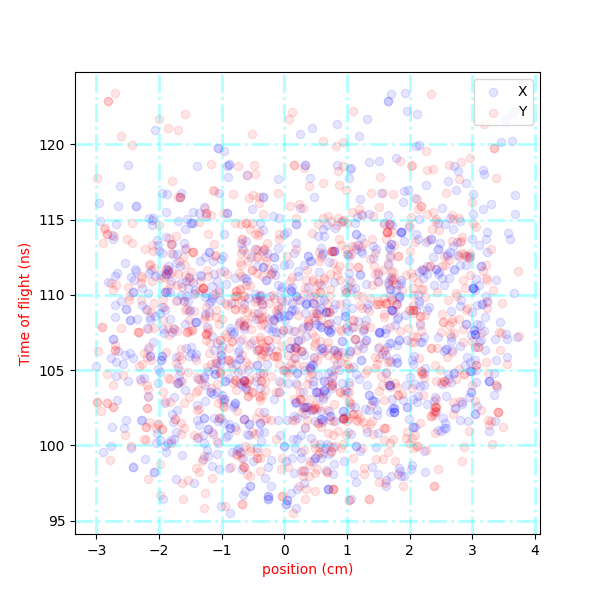

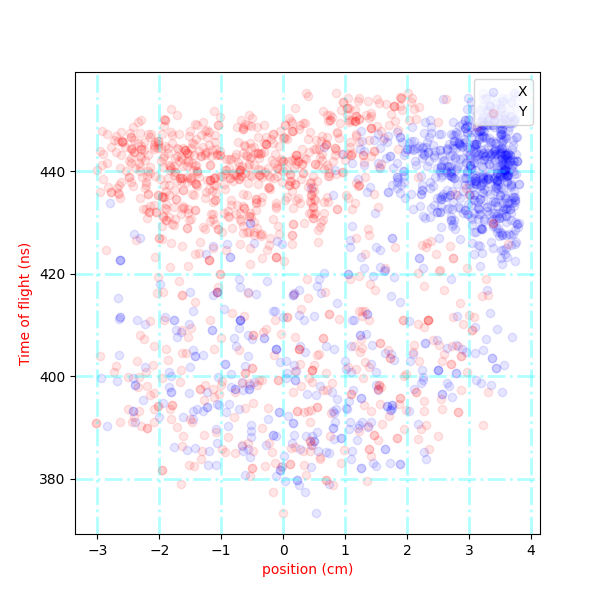

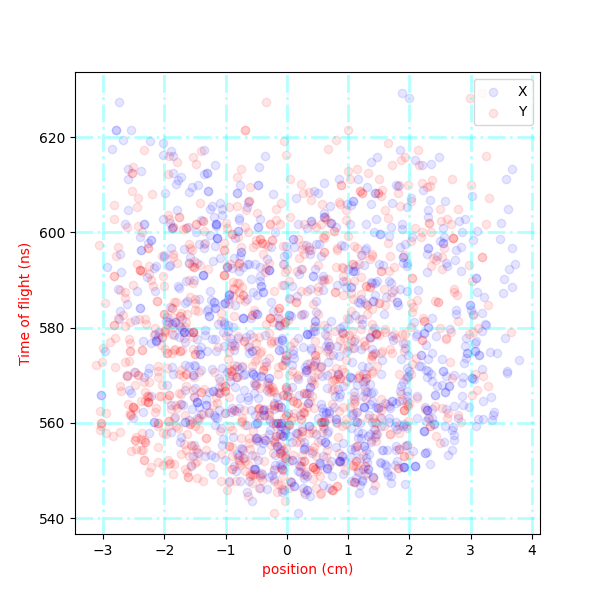

In [ ]:
for i in range(len(pick_ions_plot)):
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    dld_x_masked = variables.dld_x[pick_ions_plot[i]]
    dld_y_masked = variables.dld_y[pick_ions_plot[i]]
    dld_t_masked = variables.dld_t[pick_ions_plot[i]]
    if len(dld_x_masked) > 1000:
        mask_plot = np.random.randint(0, len(dld_x_masked), 1000)
        x = plt.scatter(dld_x_masked[mask_plot], dld_t_masked[mask_plot], color="blue", label='X', alpha=0.1)
        y = plt.scatter(dld_y_masked[mask_plot], dld_t_masked[mask_plot], color="red", label='Y', alpha=0.1)
    else:
        x = plt.scatter(dld_x_masked, dld_t_masked, color="blue", label='X', alpha=0.1)
        y = plt.scatter(dld_y_masked, dld_t_masked, color="red", label='Y', alpha=0.1)
    ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=10)
    ax1.set_xlabel("position (cm)", color="red", fontsize=10)
    plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
    plt.legend(handles=[x, y], loc='upper right')
    plt.ylim(bottom=plt.yticks()[0][0], top=plt.yticks()[0][-1])
    plt.xlim(left=plt.xticks()[0][0], right=plt.xticks()[0][-1])
    plt.savefig(variables.result_path + 'position_peak.png', format="png", dpi=600)
    plt.savefig(variables.result_path + 'position_peak.svg', format="svg", dpi=600)
    plt.show()

<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

As you saw the TOF changes base on the (x,y) of the events. Therefore we creat a mask to only select the ions in center (8m
m*8mm) of detector. This helps to cansel out the variation in TOF due to hit position
    
<br>Reformulate the equation for volatege atom probe:<br>
</div>
$$t = d(\sqrt{\frac{\frac{m}{n}}{k\alpha (V_{dc}+\beta V_{pulse})}})-t_{0} $$<br>

(12056,)


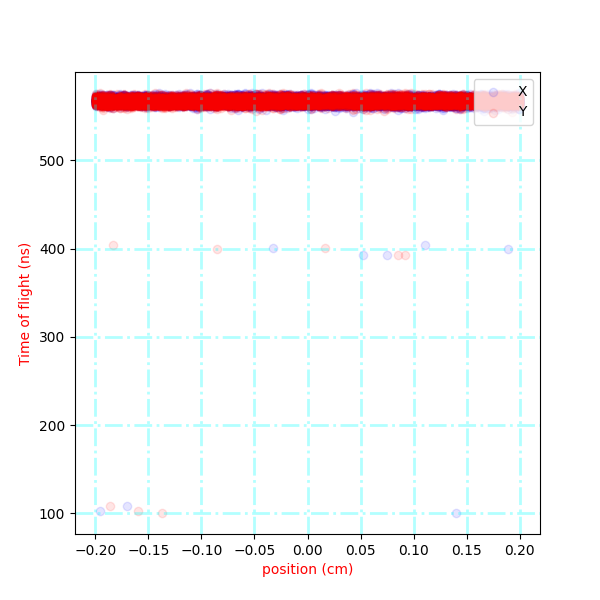

In [32]:
# use mask_equal to have equal number of ions for each peak
# only peak the value in the center of detector 8mm * 8mm
detector_squre = 0.2
vol_variation = 100
fig1, ax1 = plt.subplots(figsize=(6, 6))
dld_x_masked = variables.dld_x[mask]
dld_y_masked = variables.dld_y[mask]
dld_t_masked = variables.dld_t[mask]
dld_highVoltage_masked = variables.dld_high_voltage[mask]

mask_tmp_middle = np.logical_and((np.abs(dld_x_masked) < detector_squre), (np.abs(dld_y_masked) < detector_squre))
mask_tmp_mvoltage = mask_tmp_mvoltage = np.logical_and((dld_highVoltage_masked < (np.mean(dld_highVoltage_masked)+100)), (dld_highVoltage_masked > (np.mean(dld_highVoltage_masked)-100)))
mask_f = np.logical_and(mask_tmp_mvoltage, mask_tmp_middle)

dld_x_masked = dld_x_masked[mask_f]
dld_y_masked = dld_y_masked[mask_f]
dld_t_masked = dld_t_masked[mask_f]
dld_highVoltage_masked = dld_highVoltage_masked[mask_f]

mc_seb_reg_masked = mc_seb_ideal[mask]
mc_seb_reg_masked = mc_seb_reg_masked[mask_f]

print(dld_t_masked.shape)
x = plt.scatter(dld_x_masked, dld_t_masked, color="blue", label='X', alpha=0.1)
y = plt.scatter(dld_y_masked, dld_t_masked, color="red", label='Y', alpha=0.1)
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=10)
ax1.set_xlabel("position (cm)", color="red", fontsize=10)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.legend(handles=[x, y], loc='upper right')
plt.ylim(bottom=plt.yticks()[0][0], top=plt.yticks()[0][-1])
plt.xlim(left=plt.xticks()[0][0], right=plt.xticks()[0][-1])
plt.savefig(variables.result_path + 'center.png' , format="png", dpi=600)
plt.savefig(variables.result_path + 'center.svg' , format="svg", dpi=600)

plt.show()


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

We calculate the ${t_0}$ base on:
</div>
$$t_{0} = \frac{\sum_{n=1}^n{\left (t - L_{flight}  \sqrt{\frac{m/n}{2eV}} \right )}}{n}$$<br>

In [39]:
seb_t = dld_t_masked * 1E-9  # tof in s
seb_factor = np.sqrt(mc_seb_reg_masked * 1.66E-27 / (2 * 1.6E-19 * dld_highVoltage_masked))

seb_factor = seb_factor * 1E6
seb_t = seb_t * 1E9

t0_seb_fixed = np.mean(np.array([seb_t]).squeeze(0) - (flightPathLength_d.value * np.array([seb_factor]).squeeze(0).reshape(-1, 1)))
print('Linear fixed path lenght -- the flight path lenght(slop): {:.2f}'.format(flightPathLength_d.value), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb_fixed), '(ns)')


Linear fixed path lenght -- the flight path lenght(slop): 110.00 (mm) 
the corrected t_0(intercept): 25.79 (ns)


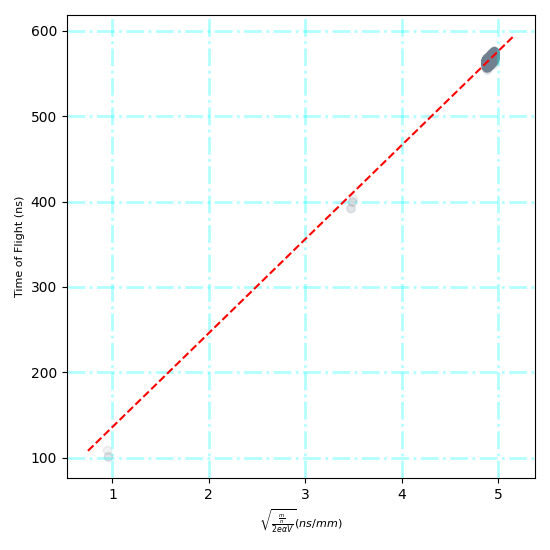

In [40]:
# Plot outputs
# fig1, ax1 = plt.subplots(figsize=(5.5/2.54, 5.5/2.54))
fig1, ax1 = plt.subplots(figsize=(5.5, 5.5))
peaks_data = plt.scatter(seb_factor, seb_t, label='Ions', alpha=0.1, color='slategray')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())

linear_fix, = plt.plot(x_vals, t0_seb_fixed + flightPathLength_d.value * x_vals, '--', color='red', label='line' )

plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
# plt.legend(handles=[linear_fix, peaks_data], loc='lower right')

ax1.set_ylabel("Time of Flight (ns)", fontsize=8)

ax1.set_xlabel(r"$\sqrt{\frac{\frac{m}{n}}{2e \alpha V}} (ns/mm)$", fontsize=8)
plt.tight_layout()
plt.ylim(bottom=plt.yticks()[0][0], top=plt.yticks()[0][-1])
plt.xlim(left=plt.xticks()[0][0], right=plt.xticks()[0][-1])
plt.savefig(variables.result_path + 'fixed_flight_path.svg', format="svg", dpi=600)
plt.savefig(variables.result_path + 'fixed_flight_path.png', format="png", dpi=600)

plt.show()

In [41]:
# huber = linear_model.HuberRegressor(alpha=1E-9,epsilon=1)
# huber.fit(np.array([seb_factor]).squeeze(0).reshape(-1, 1), np.array([seb_t]).squeeze(0))
# d_seb_huber = huber.coef_.item()
# t0_seb_huber = huber.intercept_.item()          
# print('Huber -- 2 the corrected flight path lenght(slop): {:.2f}'.format(d_seb_huber), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb_huber), '(ns)')

# bayesian_ridge = linear_model.Ridge(alpha=1)
# bayesian_ridge.fit(np.array([seb_factor]).squeeze(0).reshape(-1, 1) , np.array([seb_t]).squeeze(0))
# d_seb_rigid = bayesian_ridge.coef_.item()
# t0_seb_rigid = bayesian_ridge.intercept_.item()         
# print('Rigid -- the corrected flight path lenght(slop): {:.2f}'.format(d_seb_rigid), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb_rigid), '(ns)')
# Train the model using the data sets ( linear regression)
linear = linear_model.LinearRegression()
linear.fit(np.array([seb_factor]).squeeze(0).reshape(-1, 1), np.array([seb_t]).squeeze(0))
d_seb = linear.coef_.item()
t0_seb = linear.intercept_.item()

print('Linear -- the corrected flight path lenght(slop): {:.2f}'.format(d_seb), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb), '(ns)')
# # Train the model using the data sets ( Lasso regression)
# lasso = linear_model.Lasso(alpha=1)
# lasso.fit(np.array([seb_factor]).squeeze(0).reshape(-1, 1), np.array([seb_t]).squeeze(0))
# d_seb_lasso = lasso.coef_.item()
# t0_seb_lasso = lasso.intercept_.item() 
# print('Lasso -- the corrected flight path lenght(slop): {:.2f}'.format(d_seb_lasso), '(mm)', '\nthe corrected t_0(intercept): {:.2f}'.format(t0_seb_lasso), '(ns)')


Linear -- the corrected flight path lenght(slop): 115.99 (mm) 
the corrected t_0(intercept): -3.68 (ns)


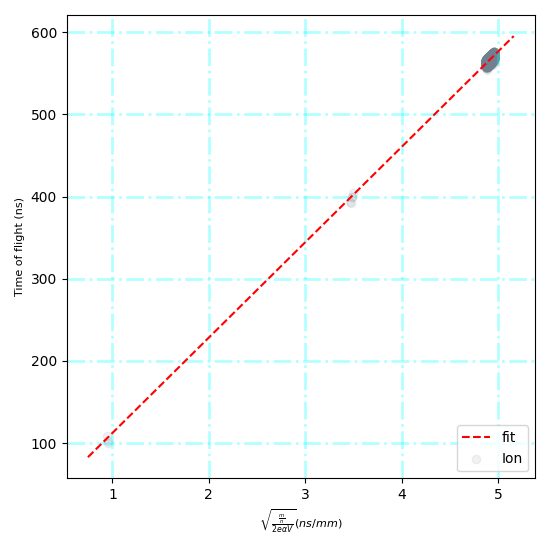

In [42]:
# Plot outputs

# fig1, ax1 = plt.subplots(figsize=(5.5/2.54, 5.5/2.54))
fig1, ax1 = plt.subplots(figsize=(5.5, 5.5))
peaks_data = plt.scatter(seb_factor, seb_t, color="slategray", label='Ion', alpha=0.1)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())


linear, = plt.plot(x_vals, t0_seb + d_seb * x_vals, '--', color='r', label='fit' )


plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)

# plt.legend(handles=[peaks_data, linear, rigid, huber,lasso], loc='lower right')
ax1.set_ylabel("Time of flight (ns)", fontsize=8)
ax1.set_xlabel(r"$\sqrt{\frac{\frac{m}{n}}{2e \alpha V}} (ns/mm)$", fontsize=8)
plt.legend(handles=[linear, peaks_data], loc='lower right')
plt.tight_layout()
plt.ylim(bottom=plt.yticks()[0][0], top=plt.yticks()[0][-1])
plt.xlim(left=plt.xticks()[0][0], right=plt.xticks()[0][-1])

plt.savefig(variables.result_path + 'regression.svg', format="svg", dpi=600)
plt.savefig(variables.result_path + 'regression.png', format="png", dpi=600)
    

plt.show()

In [43]:
# # Plot outputs


# fig1, ax1 = plt.subplots(figsize=(5.5, 5.5))
# peaks_data = plt.scatter(seb_factor, seb_t, color="slategray", label='Ions', alpha=0.1)
# axes = plt.gca()
# x_vals = np.array(axes.get_xlim())


# rigid, = plt.plot(x_vals, t0_seb_rigid + d_seb_rigid * x_vals, '--', color='b', label='Rigid' )
# huber, = plt.plot(x_vals, t0_seb_huber + d_seb_huber * x_vals, '--', color='g', label='Huber' )
# lasso, = plt.plot(x_vals, t0_seb_lasso + d_seb_lasso * x_vals, '--', color='y', label='lasso' )

# plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)

# # plt.legend(handles=[peaks_data, linear, rigid, huber,lasso], loc='lower right')
# ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=8)
# ax1.set_xlabel(r"$\sqrt{\frac{m/n}{k\alpha(V_{dc}+\beta*V_{pulse} )}} (ns/mm)$", color="red", fontsize=8)


# plt.savefig(variables.result_path + 'regression.svg', format="svg", dpi=600)
# plt.savefig(variables.result_path + 'regression.png', format="png", dpi=600)
    
# plt.legend(handles=[rigid, huber,  lasso, peaks_data], loc='lower right')
# plt.tight_layout()
# plt.show()

In [44]:
print('t_0:', t0_seb, 'flight path distance:', d_seb)
t0_new = t0_seb
flightPathLength_new = d_seb

t_0: -3.6816837062482364 flight path distance: 115.99314230881404


<div style="margin: 0 auto; padding: 20px; font-family: 'Helvetica', sans-serif; font-size: 16px;">

Plot the m/c with new ${t_0}$:
</div>

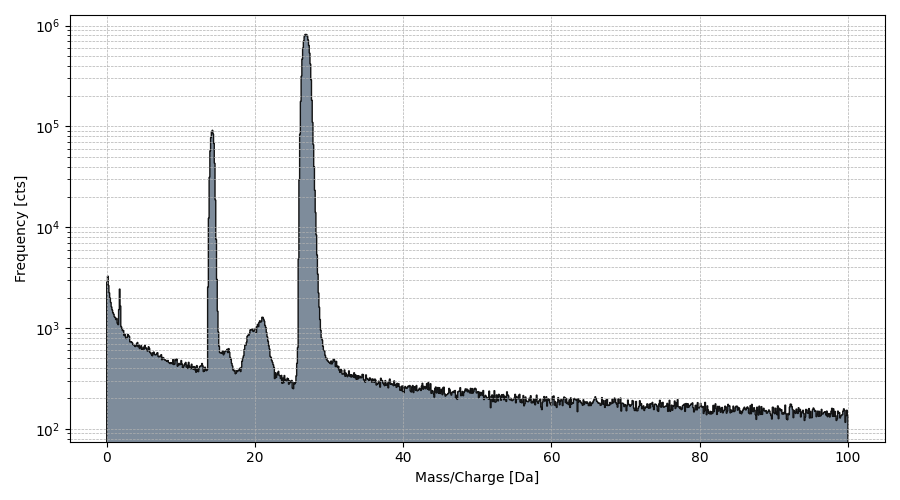

In [45]:
# recalulate the mc based on the new t_0
mc = mc_tools.tof2mc(variables.dld_t, t0_new, variables.dld_high_voltage, variables.dld_x_det, variables.dld_y_det, flightPathLength_new, variables.dld_pulse, mode='voltage')

mc_hist = mc_plot.AptHistPlotter(mc[mc < 100], variables)
y, x = mc_hist.plot_histogram(bin_width=0.1, label='mc', steps='stepfilled', log=True, grid=True, fig_size=(9, 5))
peaks, properties, peak_widths, prominences = mc_hist.find_peaks_and_widths(prominence=100, distance=10, percent=50)
mc_hist.plot_peaks()
mc_hist.plot_hist_info_legend(label='mc', bin=0.1, background=None, loc='right') 